# LIBRARY

In [1]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io.wavfile
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
import os

# AKUISISI

In [2]:
path_file = os.listdir('data/data_fix/')
label = [filesname.replace('.csv', '') for filesname in path_file]

# label
file = {}
for no_label in label:
    data = pd.read_csv(f'data/data_fix/{no_label}.csv')
    file[no_label] = data
    globals()[no_label] = data

# WINDOWING/SEGMENTASI

In [26]:
window_size = 6000
window_step = 1800


file_segmen = []
for no_segmen in range(0,len(label)):
    file[label[no_segmen]].columns = ["num","ir","waktu"]
    path1 = file[label[no_segmen]][(file[label[no_segmen]].waktu >10)]
    path1 = path1[(path1.waktu <=190)]
    
    for no_window in range(0,len(path1),window_step):
        window = path1[no_window:no_window+window_size]
        file_segmen.append(window)

In [27]:
len(file_segmen[0])

6000

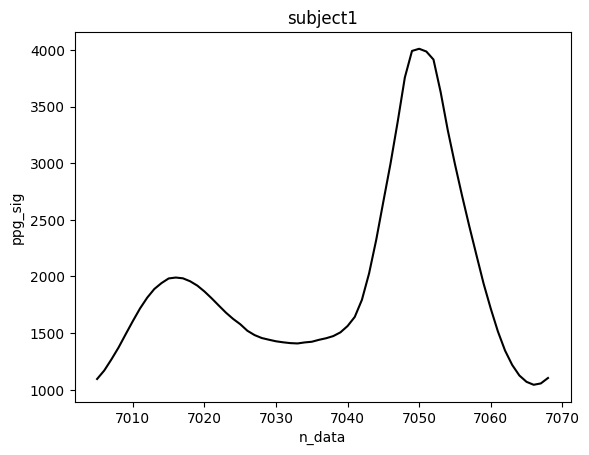

In [5]:
# andika_tkr['ir'].plot(title = 'subject1',xlabel = 'n_data', ylabel = 'ppg_sig', color = 'black');
# aldi_tkr
angka = 7005
andika_tkr['ir'][angka:angka+64].plot(title = 'subject1',xlabel = 'n_data', ylabel = 'ppg_sig', color = 'black');

<Axes: >

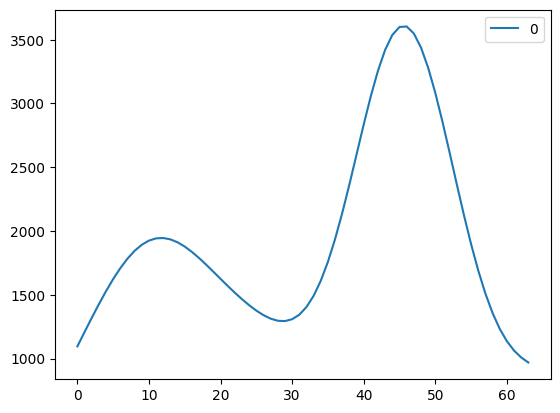

In [6]:
import heartpy as hp
filtered = hp.filter_signal(andika_tkr['ir'][7005:7005+64], cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')
pd.DataFrame(filtered).plot()

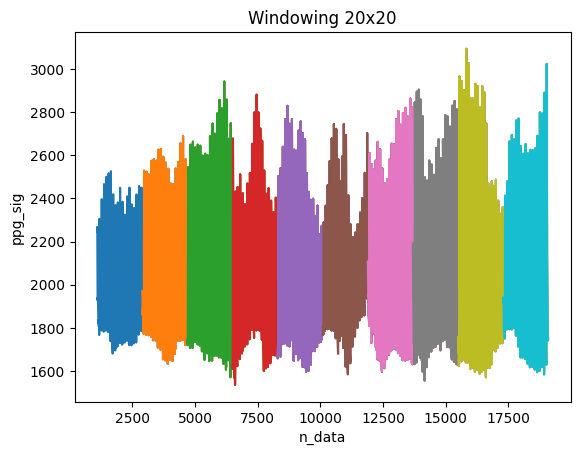

In [29]:
# a = (file_segmen[29])['ir']
# b = (file_segmen[30])['ir']
# c = (file_segmen[31])['ir']

a = (file_segmen[0])['ir']
b = (file_segmen[1])['ir']
c = (file_segmen[2])['ir']
d = (file_segmen[3])['ir']
e = (file_segmen[4])['ir']
f = (file_segmen[5])['ir']
g = (file_segmen[6])['ir']
h = (file_segmen[7])['ir']
j = (file_segmen[8])['ir']
k = (file_segmen[9])['ir']
l = (file_segmen[10])['ir']
m = (file_segmen[11])['ir']


a.plot(title = 'Windowing 20x20',xlabel = 'n_data',ylabel = 'ppg_sig');
b.plot();
c.plot();
d.plot();
e.plot();
f.plot();
g.plot();
h.plot();
j.plot();
k.plot();
# l.plot();
# m.plot();


# NORMALIZE
## VARIANCE BPM & STD BPM

In [30]:
info = []
minmaxx = []
signals = []
data_var = []
data_std = []
ppg_elgendi = []
for no_minmax in range(0,len(file_segmen)):
    minmax = MinMaxScaler(feature_range=(0,1))
    
    path_minmax1 = minmax.fit_transform(file_segmen[no_minmax])
    path_minmax_seg1 = pd.DataFrame(path_minmax1)[1]
    path_minmax_seg1 = nk.ppg_clean(path_minmax_seg1, sampling_rate=100, method='elgendi')
    ppg_elgendi.append(path_minmax_seg1)
    path_minmax_seg1 = pd.DataFrame(path_minmax_seg1)

    signals1, info1 = nk.ppg_process(path_minmax_seg1, sampling_rate=100)

    minmaxx.append(path_minmax_seg1)
    signals.append(signals1)
    info.append(info1)

    data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
    data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\3818205109.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\3818205109.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\3818205109.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\3818205109.py:23: FutureWarning: Calling float on a single element Series is deprecated and will 

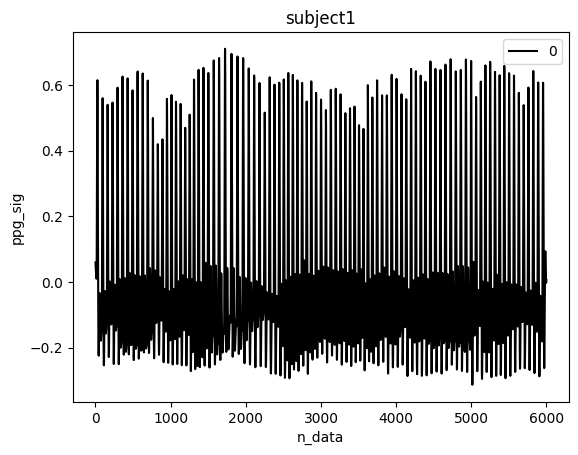

In [31]:
minmaxx[30].plot(title = 'subject1',xlabel = 'n_data',ylabel = 'ppg_sig', color = 'black');

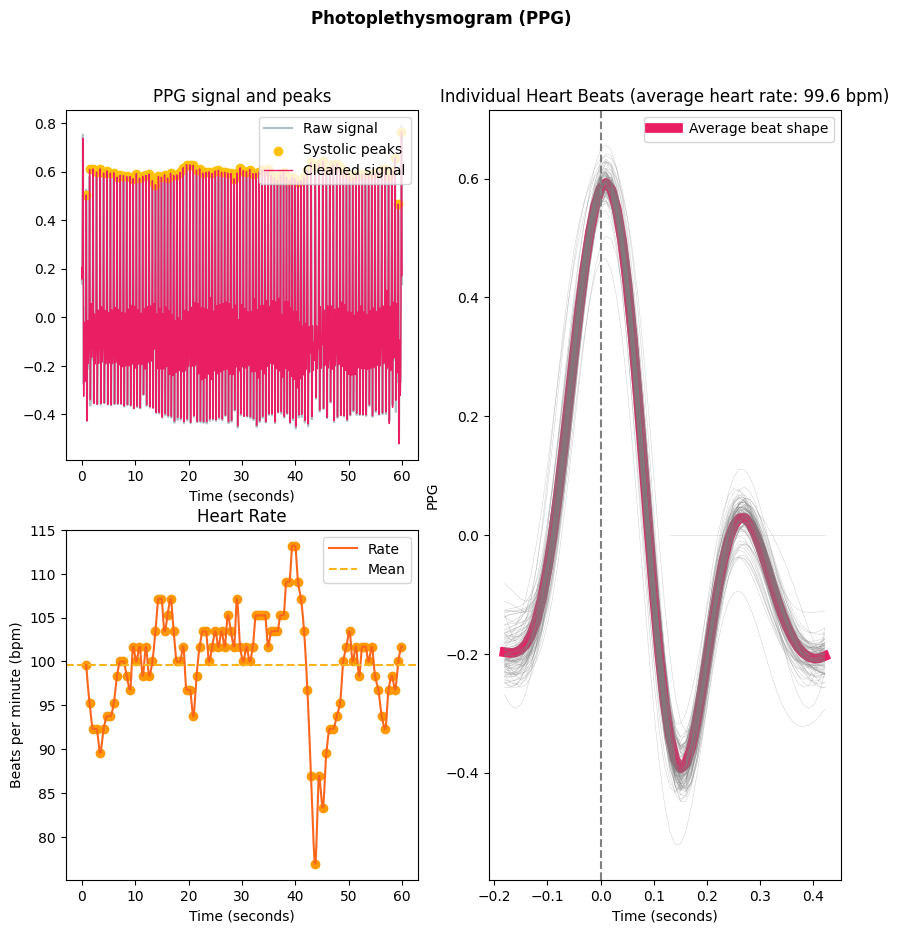

In [47]:
a = (signals[0])
b = (signals[1])
c = (signals[30])

# a['PPG_Clean'].plot()
# b['PPG_Clean'].plot()
# c['PPG_Clean'].plot(title = 'subject1',xlabel = 'n_data',ylabel = 'ppg_sig', color = 'black')
nk.ppg_plot(signals[124], info[124])
# nk.ppg_plot(signals[130], info1[30])
# info[30]

<Axes: >

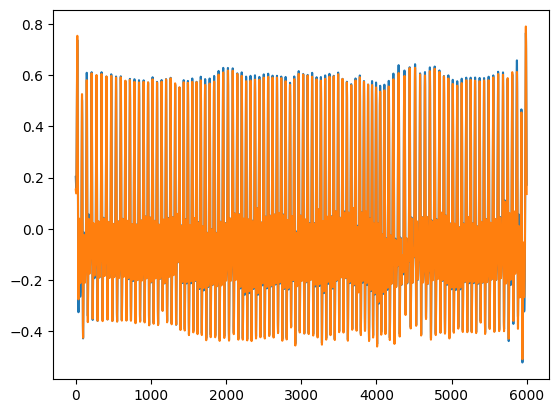

In [53]:
a = signals[124]

a['PPG_Clean'].plot()
a['PPG_Raw'].plot()

# BPM & HRV

In [33]:
analyze_signals = []
bpm = []
hrv = []
rmssd = []
sdnn = []
for no_analyze in range(0,len(file_segmen)):
    analyze_signals1 = nk.ppg_analyze(signals[no_analyze], sampling_rate=100)

    analyze_signals.append(analyze_signals1)
    bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
    hrv.append(float(analyze_signals1['HRV_MeanNN']))
    rmssd.append(float(analyze_signals1['HRV_RMSSD']))
    sdnn.append(float(analyze_signals1['HRV_SDNN']))
    
    

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\286699480.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\286699480.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv.append(float(analyze_signals1['HRV_MeanNN']))
C:\Users\MY ASUS\AppDa

In [35]:
analyze_signals[30][['PPG_Rate_Mean','HRV_MeanNN','HRV_SDNN','HRV_RMSSD']]

,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD
0,92.15799,651.111111,46.914803,23.938122


In [36]:
pd.DataFrame(bpm).mean()

0    90.236602
dtype: float64

In [14]:
# analyze_signals[30].to_excel('analisis30.xlsx')

In [15]:
# ppg_elgendi = []
# for no_ppgelgendi in range(0,len(file_segmen)): 
#         ppg_elgendi1 = nk.ppg_clean(minmaxx[no_ppgelgendi], sampling_rate=100, method='elgendi')
#         ppg_elgendi.append(ppg_elgendi1)

<Axes: >

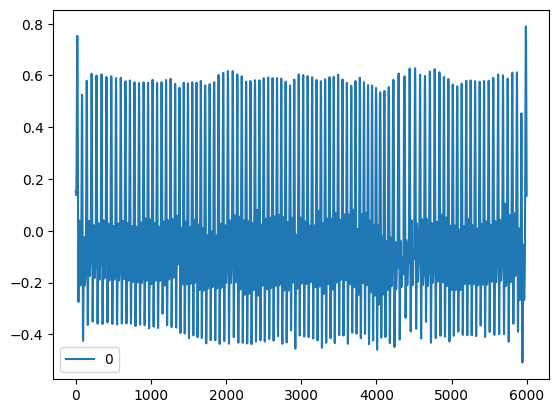

In [40]:
pd.DataFrame(minmaxx[124]).plot()

# SISTOL&DIASTOL&DISTANCE

In [38]:
sistol = []
diastol = []
distance = []
peak_sistol = {}
peak_diastol = {}

for no_sisdis in range(0,len(file_segmen)):  
    path = ppg_elgendi[no_sisdis]
    med = path.max()/4
    sistol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] > med:
            sistol1.append(i)


    diastol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] < med:
            diastol1.append(i)

    peak_sistol[no_sisdis] = sistol1
    peak_diastol[no_sisdis] = diastol1
    sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
    diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
    distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))

    # plt.plot(path);
    # plt.plot(diastol1, path[diastol1], "x");
    # plt.plot(sistol1, path[sistol1], "x");

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\3788574392.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\3788574392.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_4556\3788574392.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))


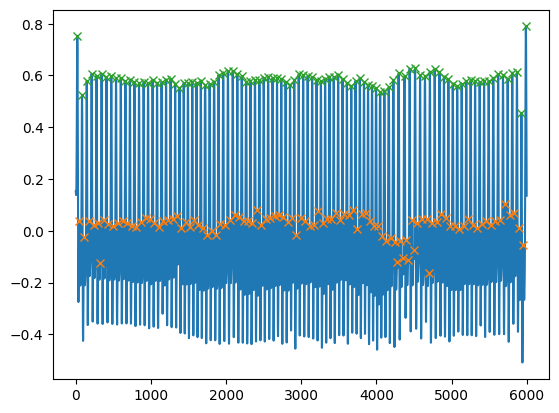

In [39]:
no = 124
for no_sisdis in range(no,no+1):  
    path = ppg_elgendi[no_sisdis]
    med = path.max()/4
    sistol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] > med:
            sistol1.append(i)


    diastol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] < med:
            diastol1.append(i)

    # peak_sistol[no_sisdis] = sistol1
    # peak_diastol[no_sisdis] = diastol1
    # sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
    # diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
    # distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))

    plt.plot(path);
    plt.plot(diastol1, path[diastol1], "x");
    plt.plot(sistol1, path[sistol1], "x");

In [19]:
a = pd.DataFrame(ppg_elgendi[30])
peaks_diastol = diastol1
# peaks_sistol = sistol1
# peaks_diastol
# import matplotlib.pyplot as plt
# plt.plot(a);
# plt.plot(peaks_diastol, a[peaks_diastol], "x");
# plt.plot(peaks_sistol, nasah[peaks_sistol], "x");

# DATAFRAME

In [20]:
dataajah = {'BPM':bpm,'HRV':hrv,'RMSSD':rmssd,'SDNN':sdnn,'VAR':data_var,'STD':data_std,'SISTOL':sistol,'DIASTOL':diastol,'DISTANCE':distance}

In [21]:
dataaaaa = pd.DataFrame(dataajah)
# dataaaaa.to_excel('DATA_KNN_1500x1500.xlsx')

# LABELING

In [22]:
bahan_label = pd.read_excel('excel/label.xlsx')
nama = bahan_label['nama'] 
kecemasan = bahan_label['kecemasan'] 
angka_kecemasan = bahan_label['angka_kecemasan']

In [23]:
180/18

10.0

In [24]:
named = []
anxd = []
anganxd = []
for name,anx,anganx in zip(nama,kecemasan,angka_kecemasan):
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)

    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)

    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)


anxd = pd.DataFrame(anxd)
anxd.column = 'KECEMASAN'
anganxd = pd.DataFrame(anganxd)
anganxd.column = 'KECEMASAN REGRESI'
named = pd.DataFrame(named)
named.column = 'NAMA'


a = pd.concat([named,dataaaaa,anxd,anganxd], axis=True)
a.columns = [
'NAMA',
'BPM',
'HRV',
'RMSSD',
'SDNN',
'VAR',
'STD',
'SISTOL',
'DIASTOL',
'DISTANCE',
'KECEMASAN',
'KECEMASAN_REGRESI']


In [25]:
# a.to_excel('excel/bahan_knn_new/DATA_KNN_6000x1800_NEW.xlsx')f